In [1]:
import pandas as pd
import numpy as np
import re

In [64]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Loki\Downloads\fake_job\Data_wrangling.csv')

In [3]:
df.head(5)

,Unnamed: 0,job_id,title,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,State,City,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits
0,0,1,Marketing Intern,Marketing,Unspecified,0,1,0,Other,Internship,...,NY,New York,"['food', 'fast', 'growing', 'james', 'beard', ...","['food', 'weve', 'created', 'groundbreaking', ...","['experience', 'content', 'management', 'syste...",['Unspecified'],90,90,75,1
1,1,2,Customer Service - Cloud Video Production,Success,Unspecified,0,1,0,Full-time,Not Applicable,...,,Auckland,"['organised', 'focused', 'vibrant', 'awesomedo...","['second', 'world', 'cloud', 'video', 'product...","['expect', 'youyour', 'key', 'responsibility',...","['get', 'usthrough', 'part', 'second', 'team',...",97,97,121,108
2,2,3,Commissioning Machinery Assistant (CMA),Unspecified,Unspecified,0,1,0,Unspecified,Unspecified,...,IA,Wever,"['client', 'located', 'houston', 'actively', '...","['valor', 'service', 'provides', 'workforce', ...","['implement', 'pre', 'commissioning', 'commiss...",['Unspecified'],79,79,110,1
3,3,4,Account Executive - Washington DC,Sales,Unspecified,0,1,0,Full-time,Mid-Senior level,...,DC,Washington,"['company', 'esri', 'environmental', 'system',...","['passion', 'improving', 'quality', 'life', 'g...","['education', 'bachelor', 'master', 'gi', 'bus...","['culture', 'anything', 'corporatewe', 'collab...",57,57,123,78
4,4,5,Bill Review Manager,Unspecified,Unspecified,0,1,1,Full-time,Mid-Senior level,...,FL,Fort Worth,"['job', 'title', 'itemization', 'review', 'man...","['spotsource', 'solution', 'llc', 'global', 'h...","['qualificationsrn', 'license', 'state', 'texa...","['full', 'benefit', 'offered']",152,152,62,3


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.columns

Index(['job_id', 'title', 'department', 'salary_range', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'Country', 'State', 'City', 'description_d',
       'company_profile_d', 'requirements_d', 'benefits_d',
       'length_description', 'length_company_profile', 'length_requirements',
       'length_benefits'],
      dtype='object')

In [6]:
print(df.salary_range.unique())

['Unspecified' '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '50000-70000' '45000-60000'
 '30000-40000' '70000-90000' '10000-14000' '50-110' '28000-45000'
 '0-34300' '35000-40000' '9-Dec' '44000-57000' '18500-28000' '55000-75000'
 '30000-35000' '0-0' '20000-40000' '360000-600000' '50000-80000'
 '80000-100000' '52000-78000' '15750-15750' '40000-65000' '45000-50000'
 '30000-37000' '45000-67000' '35000-100000' '180000-216000' '45000-65000'
 '28000-32000' '0-1000' '36000-40000' '80000-110000' '35000-73000'
 '19000-19000' '60000-120000' '120000-15000000' '42000-55000'
 '90000-120000' '100000-150000' '28000-38000' '1600-1700' '50000-60000'
 '30000-70000' '32000-40000' '50-100' '9000-17000' '23040-28800' '105-110'
 '13000-16000' '100000-180000' '45000-55000' '9000-12000' '50000-90000'
 '25000-42000' '40000-60000' '600000-750000' '120000-170000' '45000-90000'
 '2

In [7]:
df[df.salary_range=='4-Jun']

,job_id,title,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,State,City,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits
9124,9125,Senior Executive,Marketing,4-Jun,1,0,0,Full-time,Not Applicable,Bachelor's Degree,...,MH,Mumbai,"['tinyowl', 'starting', 'revolution', 'food', ...",['Unspecified'],"['youll', 'needbachelors', 'discipline', 'prer...","['perksas', 'early', 'member', 'marketing', 't...",1,1,35,24


In [8]:
def change(x):
    if x =='Unspecified':
        x=0
    return x

df['salary_range']=df.salary_range.apply(lambda x : change(x))



In [9]:
def removing_of_string(text):
    
    text_=re.sub(r'([A-za-z]+)',
                 '0',
                  str(text))
    return text_

df.salary_range=df.salary_range.apply(lambda x:removing_of_string(x))
df.salary_range.unique()

array(['0', '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-0', '44000-57000', '18500-28000', '55000-75000',
       '30000-35000', '0-0', '20000-40000', '360000-600000',
       '50000-80000', '80000-100000', '52000-78000', '15750-15750',
       '40000-65000', '45000-50000', '30000-37000', '45000-67000',
       '35000-100000', '180000-216000', '45000-65000', '28000-32000',
       '0-1000', '36000-40000', '80000-110000', '35000-73000',
       '19000-19000', '60000-120000', '120000-15000000', '42000-55000',
       '90000-120000', '100000-150000', '28000-38000', '1600-1700',
       '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '13000-

In [10]:
t=df.salary_range.str.split('-',n=1,expand=True)
df['Minimum_salary_range']=t[0]
df['Maximum_salary_range']=t[1]

In [11]:
df.drop(columns=['salary_range'],inplace=True)


In [12]:
print(df.Minimum_salary_range.isnull().any())

print(df.Minimum_salary_range.dtypes)

df.Minimum_salary_range=df.Minimum_salary_range.astype('int32')

print(df.Minimum_salary_range.dtypes)

False
object
int32


In [13]:
df.Minimum_salary_range[:10]

0        0
1        0
2        0
3        0
4        0
5        0
6    20000
7        0
8        0
9        0
Name: Minimum_salary_range, dtype: int32

In [14]:
df.Maximum_salary_range[:10]

0     None
1     None
2     None
3     None
4     None
5     None
6    28000
7     None
8     None
9     None
Name: Maximum_salary_range, dtype: object

In [15]:
df.Minimum_salary_range.unique()

array([        0,     20000,    100000,    120000,     50000,     40000,
              60,     65000,        75,     75000,     17000,     16000,
           95000,     15000,     45000,     30000,     70000,     10000,
              50,     28000,     35000,         9,     44000,     18500,
           55000,    360000,     80000,     52000,     15750,    180000,
           36000,     19000,     60000,     42000,     90000,      1600,
           32000,      9000,     23040,       105,     13000,     25000,
          600000,     18000,     22000,      5000,     11000,    110000,
           10800,     37000,     23000,    320000,     85000,      9600,
              90,      4001,      1161,        35,     21000,    124000,
           33000,     26000,     24000,        85,      7000,      4500,
              70,      2500,    130000,     21120,     48000,     84000,
          500000,        13,      1000,     14000,     55386,    115000,
              21,     16500,         3,     15500, 

In [16]:
print(df.Maximum_salary_range.isnull().any())

print(df.Maximum_salary_range.dtypes)

df.Maximum_salary_range=df.Maximum_salary_range.fillna(df.Minimum_salary_range+1000)

df.Maximum_salary_range=df.Maximum_salary_range.astype('int32')

print(df.Maximum_salary_range.dtypes)



True
object
int32


In [17]:
df.Maximum_salary_range.isnull().any()

False

In [18]:
df['Minimum_salary_range']=pd.cut(df['Minimum_salary_range'], bins=[-1,0,10,100,1000,10000,100000,1000000,800000000],right=True,labels=False)+1



In [19]:
df['Maximum_salary_range']=pd.cut(df['Maximum_salary_range'], bins=[-1,0,100,10000,100000,1000000,10000000,100000000,12000000000],right=True,labels=False)+1



In [20]:
df.head()

,job_id,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,...,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits,Minimum_salary_range,Maximum_salary_range
0,1,Marketing Intern,Marketing,0,1,0,Other,Internship,Unspecified,unspecified,...,"['food', 'fast', 'growing', 'james', 'beard', ...","['food', 'weve', 'created', 'groundbreaking', ...","['experience', 'content', 'management', 'syste...",['Unspecified'],90,90,75,1,1,3
1,2,Customer Service - Cloud Video Production,Success,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,...,"['organised', 'focused', 'vibrant', 'awesomedo...","['second', 'world', 'cloud', 'video', 'product...","['expect', 'youyour', 'key', 'responsibility',...","['get', 'usthrough', 'part', 'second', 'team',...",97,97,121,108,1,3
2,3,Commissioning Machinery Assistant (CMA),Unspecified,0,1,0,Unspecified,Unspecified,Unspecified,unspecified,...,"['client', 'located', 'houston', 'actively', '...","['valor', 'service', 'provides', 'workforce', ...","['implement', 'pre', 'commissioning', 'commiss...",['Unspecified'],79,79,110,1,1,3
3,4,Account Executive - Washington DC,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,...,"['company', 'esri', 'environmental', 'system',...","['passion', 'improving', 'quality', 'life', 'g...","['education', 'bachelor', 'master', 'gi', 'bus...","['culture', 'anything', 'corporatewe', 'collab...",57,57,123,78,1,3
4,5,Bill Review Manager,Unspecified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,...,"['job', 'title', 'itemization', 'review', 'man...","['spotsource', 'solution', 'llc', 'global', 'h...","['qualificationsrn', 'license', 'state', 'texa...","['full', 'benefit', 'offered']",152,152,62,3,1,3


In [21]:
df.required_education.unique()

array(['Unspecified', "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Some College Coursework Completed',
       'Vocational', 'Certification', 'Associate Degree', 'Professional',
       'Doctorate', 'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [22]:
def ranking(text):
    if text==('Associate Degree') or (text=='Professional') :
        text=5
    elif text=="Master's Degree":
        text=7
    elif text=="Bachelor's Degree":
        text=6
    elif text=="High School or equivalent":
        text=4
    elif (text=="Some College Coursework Completed") or (text=='Some High School Coursework'):
        text=1
    elif (text=="Vocational") or(text=="Certification")or (text=="Vocational - Degree"):
        text=2
    elif text=="Doctorate":
        text=8
    elif text=="Vocational - HS Diploma":
        text=3
    else :
        text =-1
    return text


df.required_education=df.required_education.apply(lambda x : ranking(x))

In [23]:
df.head(3)

,job_id,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,...,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits,Minimum_salary_range,Maximum_salary_range
0,1,Marketing Intern,Marketing,0,1,0,Other,Internship,-1,unspecified,...,"['food', 'fast', 'growing', 'james', 'beard', ...","['food', 'weve', 'created', 'groundbreaking', ...","['experience', 'content', 'management', 'syste...",['Unspecified'],90,90,75,1,1,3
1,2,Customer Service - Cloud Video Production,Success,0,1,0,Full-time,Not Applicable,-1,Marketing and Advertising,...,"['organised', 'focused', 'vibrant', 'awesomedo...","['second', 'world', 'cloud', 'video', 'product...","['expect', 'youyour', 'key', 'responsibility',...","['get', 'usthrough', 'part', 'second', 'team',...",97,97,121,108,1,3
2,3,Commissioning Machinery Assistant (CMA),Unspecified,0,1,0,Unspecified,Unspecified,-1,unspecified,...,"['client', 'located', 'houston', 'actively', '...","['valor', 'service', 'provides', 'workforce', ...","['implement', 'pre', 'commissioning', 'commiss...",['Unspecified'],79,79,110,1,1,3


In [24]:
df.required_experience.unique()

array(['Internship', 'Not Applicable', 'Unspecified', 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [25]:

def ranking_exp(text):
    
    if text=='Internship':
        text=2
    elif text=='Mid-Senior level':
        text=3
    elif text=='Associate':
        text=4
    elif text=='Entry level':
        text=1
    elif text=='Executive':
        text=5
    elif text=='Director':
        text=6
    else:
        text=-1
    return text

df.required_experience=df.required_experience.apply(lambda x : ranking_exp(x))


In [26]:
df.head(2)

,job_id,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,...,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits,Minimum_salary_range,Maximum_salary_range
0,1,Marketing Intern,Marketing,0,1,0,Other,2,-1,unspecified,...,"['food', 'fast', 'growing', 'james', 'beard', ...","['food', 'weve', 'created', 'groundbreaking', ...","['experience', 'content', 'management', 'syste...",['Unspecified'],90,90,75,1,1,3
1,2,Customer Service - Cloud Video Production,Success,0,1,0,Full-time,-1,-1,Marketing and Advertising,...,"['organised', 'focused', 'vibrant', 'awesomedo...","['second', 'world', 'cloud', 'video', 'product...","['expect', 'youyour', 'key', 'responsibility',...","['get', 'usthrough', 'part', 'second', 'team',...",97,97,121,108,1,3


In [27]:
df.employment_type.unique()

array(['Other', 'Full-time', 'Unspecified', 'Part-time', 'Contract',
       'Temporary'], dtype=object)

In [28]:
def ranking_emp(text):
    if text=='Full-time':
        text=5
    elif text=='Part-time':
        text=1
    elif text=='Contract':
        text=4
    elif text=='Temporary':
        text=3
    elif text=='Other':
        text=2
    else:
        text=-1
    return text
df.employment_type=df.employment_type.apply(lambda x : ranking_emp(x))

In [36]:
df.head(3)


,job_id,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,...,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits,Minimum_salary_range,Maximum_salary_range
0,1,Marketing Intern,Marketing,0,1,0,2,2,-1,unspecified,...,"['food', 'fast', 'growing', 'james', 'beard', ...","['food', 'weve', 'created', 'groundbreaking', ...","['experience', 'content', 'management', 'syste...",['Unspecified'],90,90,75,1,1,3
1,2,Customer Service - Cloud Video Production,Success,0,1,0,5,-1,-1,Marketing and Advertising,...,"['organised', 'focused', 'vibrant', 'awesomedo...","['second', 'world', 'cloud', 'video', 'product...","['expect', 'youyour', 'key', 'responsibility',...","['get', 'usthrough', 'part', 'second', 'team',...",97,97,121,108,1,3
2,3,Commissioning Machinery Assistant (CMA),Unspecified,0,1,0,-1,-1,-1,unspecified,...,"['client', 'located', 'houston', 'actively', '...","['valor', 'service', 'provides', 'workforce', ...","['implement', 'pre', 'commissioning', 'commiss...",['Unspecified'],79,79,110,1,1,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   job_id                  17880 non-null  int64 
 1   title                   17880 non-null  object
 2   department              17880 non-null  object
 3   telecommuting           17880 non-null  int64 
 4   has_company_logo        17880 non-null  int64 
 5   has_questions           17880 non-null  int64 
 6   employment_type         17880 non-null  int64 
 7   required_experience     17880 non-null  int64 
 8   required_education      17880 non-null  int64 
 9   industry                17880 non-null  object
 10  function                17880 non-null  object
 11  fraudulent              17880 non-null  int64 
 12  Country                 17880 non-null  object
 13  State                   17880 non-null  object
 14  City                    17880 non-null  object
 15  de

In [52]:
comment_words = '' 
for val in df.description_d: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [71]:
wordcloud = WordCloud(width = 800, height = 800, 
                max_words=50,  
                min_font_size = 10).generate(comment_words) 


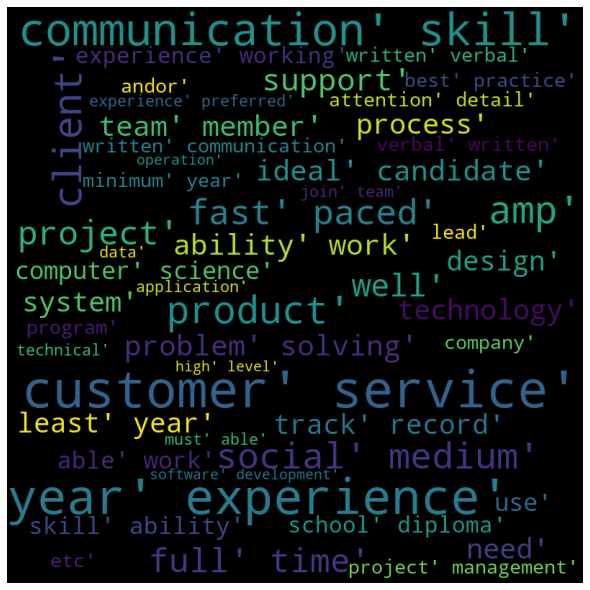

In [72]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [60]:
for val in df.requirements_d: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
    

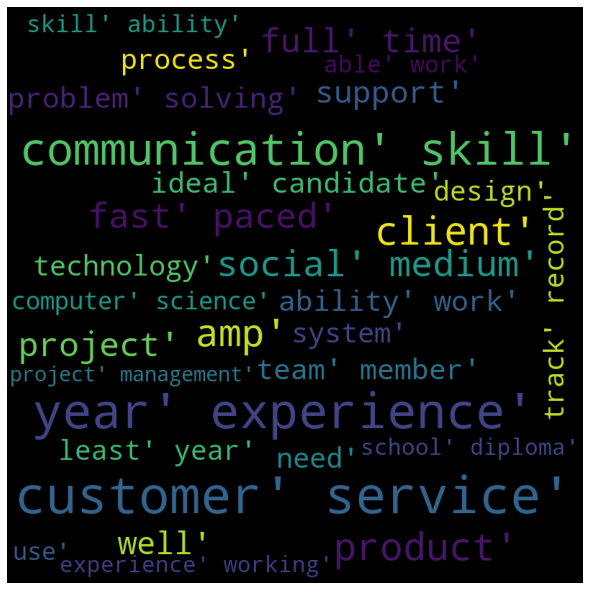

In [69]:
wordcloud = WordCloud(width = 800, height = 800, 
                max_words=30,
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [75]:
for val in df.benefits_d: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
    

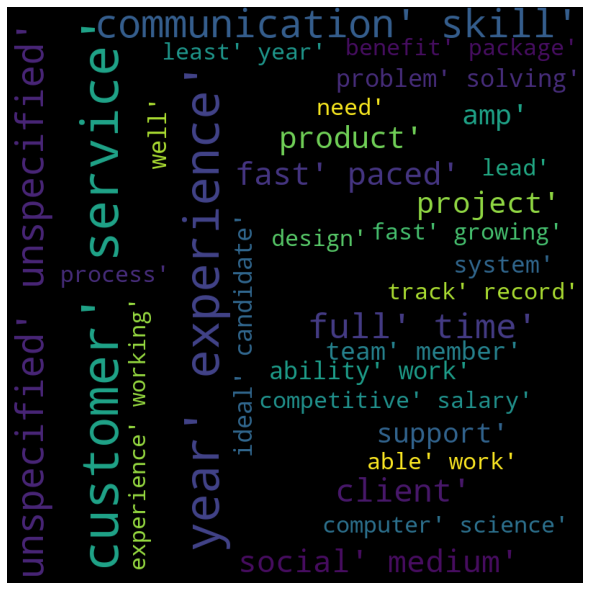

In [76]:
wordcloud = WordCloud(width = 800, height = 800, 
                max_words=30,
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
pd.